# Qiskit Workshop: Qiskit Runtime Service

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
# Save Qiskit Runtime Service credentials

QiskitRuntimeService.save_account(
    channel='ibm_cloud',
    token='<my ibm cloud api token>',
    instance='<my crn>',
    overwrite=True
)

In [3]:
# Instantiate Qiskit Runtime Service and show programs
service_ibm_cloud = QiskitRuntimeService(channel='ibm_cloud')
service_ibm_cloud.programs()

[<RuntimeProgram('qasm3-runner')>,
 <RuntimeProgram('vqc-trainer-YqZ2835Jeq')>,
 <RuntimeProgram('hello-world')>,
 <RuntimeProgram('sampler')>,
 <RuntimeProgram('estimator')>]

In [4]:
service_ibm_quantum = QiskitRuntimeService(channel='ibm_quantum')
service_ibm_quantum.programs()

[<RuntimeProgram('vqc-trainer-XB4wZPrKdv')>,
 <RuntimeProgram('hello-world')>,
 <RuntimeProgram('qaoa')>,
 <RuntimeProgram('torch-train')>,
 <RuntimeProgram('torch-infer')>,
 <RuntimeProgram('qasm3-runner')>,
 <RuntimeProgram('sampler')>,
 <RuntimeProgram('estimator')>,
 <RuntimeProgram('sample-expval')>,
 <RuntimeProgram('vqe')>,
 <RuntimeProgram('circuit-runner')>,
 <RuntimeProgram('sample-program')>,
 <RuntimeProgram('quantum-kernel-alignment')>]

In [5]:
# Choose either the IBM Cloud or IBM Quantum service

#service = service_ibm_cloud
service = service_ibm_quantum

## Basic Programs

### Hello World

In [6]:
# Execute a program by passing in the name and parameters in a dictionary
program_inputs = {'iterations': 1}
options = {"backend_name": "ibmq_qasm_simulator"}
job = service.run(program_id="hello-world",
                  options=options,
                  inputs=program_inputs
                 )
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

/tmp/ipykernel_258/2307257769.py:4: DeprecationWarning: Note that the 'job_id' and 'backend' attributes of a runtime job have been deprecated as of qiskit-ibm-runtime 0.7 and will be removed no sooner than 3 months after the release date. Please use the job_id() and backend() methods instead.
  job = service.run(program_id="hello-world",


job id: cdoj1vdn5kag9im0brn0
Hello, World!


### Sampler

In [8]:
from qiskit_ibm_runtime import Sampler, Session

# Build Bell circuit as test circuit
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# Run the circuit using the Sampler class in a Qiskit Runtime Session
with Session(service=service, backend='ibmq_qasm_simulator') as session:
    sampler = Sampler(session=session)
    job = sampler.run(circuits=bell, shots=1024)
    result = job.result()

SamplerResult(quasi_dists=[{0: 0.5302734375, 3: 0.4697265625}], metadata=[{'header_metadata': {}, 'shots': 1024, 'readout_mitigation_overhead': 1.0, 'readout_mitigation_time': 0.012999121099710464}])


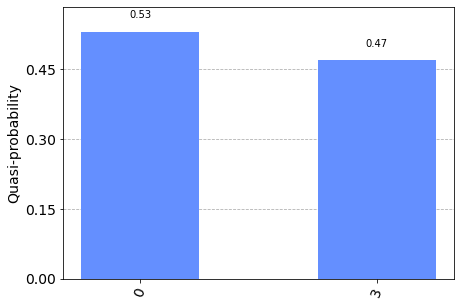

In [9]:
print(result)
plot_histogram(result.quasi_dists)

### Estimator

In [13]:
from qiskit_ibm_runtime import Estimator, Options
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp

# Create test circuit that has parameterized gates
psi1 = RealAmplitudes(num_qubits=2, reps=2)

# Create observable
H1 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])

# Parameter values for test circuit
theta1 = [0, 1, 1, 2, 3, 5]

# Set error mitigation and suppression levels
options = Options()
options.resilience_level = 2
options.optimization_level = 3

# calculate [ <psi1(theta1)|H1|psi1(theta1)> ]
with Session(service=service, backend='ibmq_qasm_simulator') as session:
    estimator =  Estimator(session=session)
    job = estimator.run(circuits=psi1,
                        observables=H1,
                        parameter_values=[theta1]
                        )
    psi1_H1_result = job.result()
print(psi1_H1_result)

EstimatorResult(values=array([1.5575]), metadata=[{'variance': 9.00953175, 'shots': 4000, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])


In [11]:
%qiskit_version_table